<a href="https://colab.research.google.com/github/iam-fern/Generate_multiplication_1X/blob/main/GQtest_data(y_hat)_multi_delta_(_2_8)_n120_01.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [1]:
import pandas as pd
import numpy as np
import os
import statistics as stats
import scipy.stats as ss
from scipy.stats import f_oneway
from scipy import stats
from google.colab import drive
import scipy.stats as stats
import time
import statsmodels.api as sm
from google.colab import files

/usr/local/lib/python3.7/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


In [2]:
drive.mount('/content/drive')

Mounted at /content/drive


In [3]:
base_path = '/content/drive/My Drive/pattern_multiplication_1X/multiplication_delta_-2.8'

In [4]:
os.listdir(base_path)

['data_multi_delta_-2.8_n20.csv',
 'data_multi_delta_-2.8_n30.csv',
 'data_multi_delta_-2.8_n60.csv',
 'data_multi_delta_-2.8_n120.csv',
 'data_multi_delta_-2.8_n250.csv']

In [5]:
# เรียกใช้ข้อมูลจากไฟล์ โดยผ่านฟังก์ชัน ที่ชื่อว่า read_csv
file_path = os.path.join(base_path, 'data_multi_delta_-2.8_n120.csv')
pd.read_csv(file_path)

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,58.336449,0.003301,68.339751,68.336578,0.003172
1,0.0,1.0,70.463498,0.000128,80.463626,80.463753,-0.000127
2,0.0,2.0,60.117473,-0.002196,70.115276,70.117620,-0.002344
3,0.0,3.0,43.645440,-0.001098,53.644341,53.645416,-0.001075
4,0.0,4.0,71.638048,0.006094,81.644142,81.638316,0.005827
...,...,...,...,...,...,...,...
119995,999.0,115.0,34.286430,-0.000741,44.285688,44.284925,0.000764
119996,999.0,116.0,66.969513,0.003793,76.973306,76.969227,0.004079
119997,999.0,117.0,64.587921,0.002842,74.590763,74.587546,0.003217
119998,999.0,118.0,81.770386,-0.002518,91.767868,91.770652,-0.002784


In [6]:
df = pd.read_csv(file_path)
df

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,58.336449,0.003301,68.339751,68.336578,0.003172
1,0.0,1.0,70.463498,0.000128,80.463626,80.463753,-0.000127
2,0.0,2.0,60.117473,-0.002196,70.115276,70.117620,-0.002344
3,0.0,3.0,43.645440,-0.001098,53.644341,53.645416,-0.001075
4,0.0,4.0,71.638048,0.006094,81.644142,81.638316,0.005827
...,...,...,...,...,...,...,...
119995,999.0,115.0,34.286430,-0.000741,44.285688,44.284925,0.000764
119996,999.0,116.0,66.969513,0.003793,76.973306,76.969227,0.004079
119997,999.0,117.0,64.587921,0.002842,74.590763,74.587546,0.003217
119998,999.0,118.0,81.770386,-0.002518,91.767868,91.770652,-0.002784


In [7]:
df = pd.read_csv(file_path, index_col=['rep', 'index'])
df

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    58.336449  0.003301  68.339751  68.336578  0.003172
      1.0    70.463498  0.000128  80.463626  80.463753 -0.000127
      2.0    60.117473 -0.002196  70.115276  70.117620 -0.002344
      3.0    43.645440 -0.001098  53.644341  53.645416 -0.001075
      4.0    71.638048  0.006094  81.644142  81.638316  0.005827
...                ...       ...        ...        ...       ...
999.0 115.0  34.286430 -0.000741  44.285688  44.284925  0.000764
      116.0  66.969513  0.003793  76.973306  76.969227  0.004079
      117.0  64.587921  0.002842  74.590763  74.587546  0.003217
      118.0  81.770386 -0.002518  91.767868  91.770652 -0.002784
      119.0  83.637529  0.001023  93.638551  93.637864  0.000687

[120000 rows x 5 columns]

In [8]:
# ลบข้อมูลที่มี missing values
table = df.dropna()
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    58.336449  0.003301  68.339751  68.336578  0.003172
      1.0    70.463498  0.000128  80.463626  80.463753 -0.000127
      2.0    60.117473 -0.002196  70.115276  70.117620 -0.002344
      3.0    43.645440 -0.001098  53.644341  53.645416 -0.001075
      4.0    71.638048  0.006094  81.644142  81.638316  0.005827
...                ...       ...        ...        ...       ...
999.0 115.0  34.286430 -0.000741  44.285688  44.284925  0.000764
      116.0  66.969513  0.003793  76.973306  76.969227  0.004079
      117.0  64.587921  0.002842  74.590763  74.587546  0.003217
      118.0  81.770386 -0.002518  91.767868  91.770652 -0.002784
      119.0  83.637529  0.001023  93.638551  93.637864  0.000687

[120000 rows x 5 columns]

In [9]:
table.reset_index(inplace=True)
table

,rep,index,x1,e,Y,y_hat,e_hat
0,0.0,0.0,58.336449,0.003301,68.339751,68.336578,0.003172
1,0.0,1.0,70.463498,0.000128,80.463626,80.463753,-0.000127
2,0.0,2.0,60.117473,-0.002196,70.115276,70.117620,-0.002344
3,0.0,3.0,43.645440,-0.001098,53.644341,53.645416,-0.001075
4,0.0,4.0,71.638048,0.006094,81.644142,81.638316,0.005827
...,...,...,...,...,...,...,...
119995,999.0,115.0,34.286430,-0.000741,44.285688,44.284925,0.000764
119996,999.0,116.0,66.969513,0.003793,76.973306,76.969227,0.004079
119997,999.0,117.0,64.587921,0.002842,74.590763,74.587546,0.003217
119998,999.0,118.0,81.770386,-0.002518,91.767868,91.770652,-0.002784


In [10]:
table.set_index(['rep', 'index'], inplace=True)

In [11]:
table

x1         e          Y      y_hat     e_hat
rep   index                                                     
0.0   0.0    58.336449  0.003301  68.339751  68.336578  0.003172
      1.0    70.463498  0.000128  80.463626  80.463753 -0.000127
      2.0    60.117473 -0.002196  70.115276  70.117620 -0.002344
      3.0    43.645440 -0.001098  53.644341  53.645416 -0.001075
      4.0    71.638048  0.006094  81.644142  81.638316  0.005827
...                ...       ...        ...        ...       ...
999.0 115.0  34.286430 -0.000741  44.285688  44.284925  0.000764
      116.0  66.969513  0.003793  76.973306  76.969227  0.004079
      117.0  64.587921  0.002842  74.590763  74.587546  0.003217
      118.0  81.770386 -0.002518  91.767868  91.770652 -0.002784
      119.0  83.637529  0.001023  93.638551  93.637864  0.000687

[120000 rows x 5 columns]

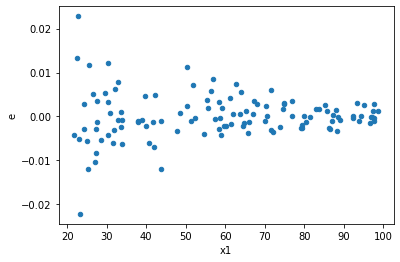

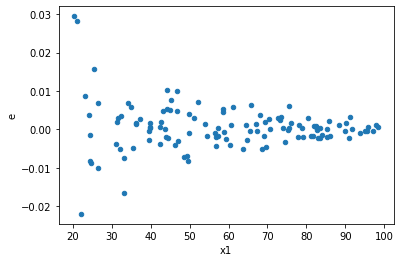

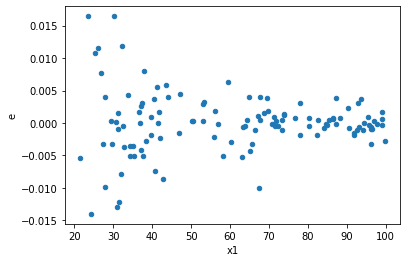

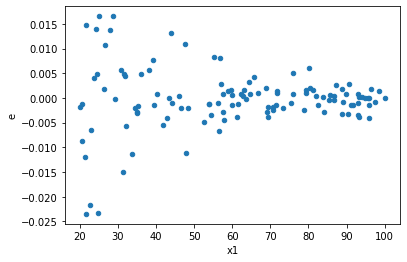

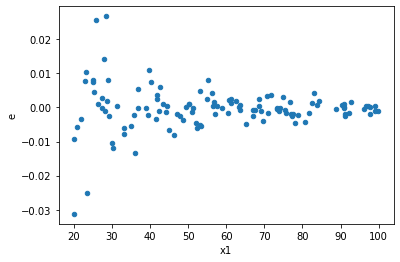

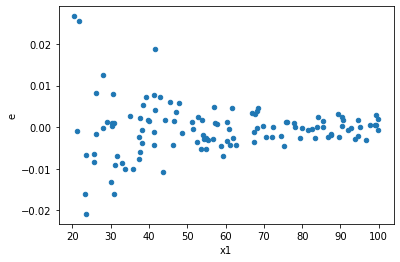

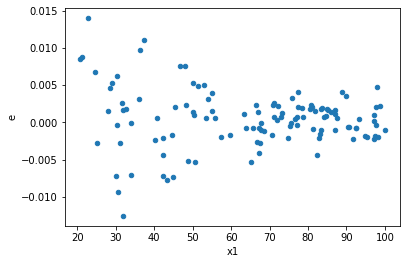

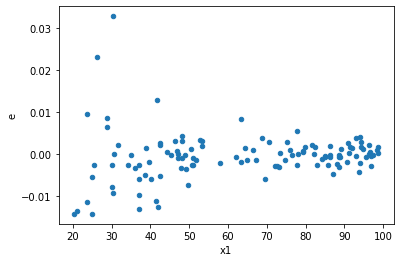

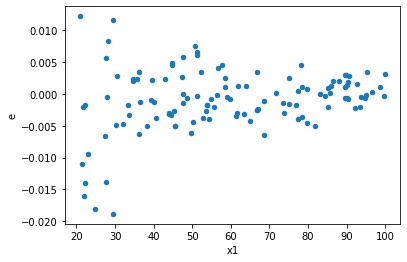

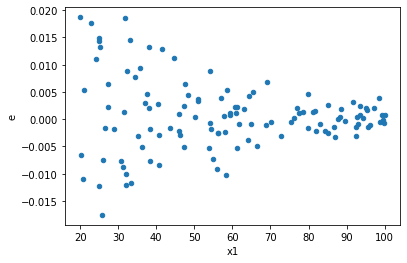

In [12]:
tablenew0 = table.loc[0.0]
tablenew1 = table.loc[1.0]
tablenew2 = table.loc[2.0]
tablenew3 = table.loc[3.0]
tablenew4 = table.loc[4.0]
tablenew5 = table.loc[5.0]
tablenew6 = table.loc[6.0]
tablenew7 = table.loc[7.0]
tablenew8 = table.loc[8.0]
tablenew9 = table.loc[9.0]
tablenew0.plot(x ='x1', y='e', kind = 'scatter')
tablenew1.plot(x ='x1', y='e', kind = 'scatter')
tablenew2.plot(x ='x1', y='e', kind = 'scatter')
tablenew3.plot(x ='x1', y='e', kind = 'scatter')
tablenew4.plot(x ='x1', y='e', kind = 'scatter')
tablenew5.plot(x ='x1', y='e', kind = 'scatter')
tablenew6.plot(x ='x1', y='e', kind = 'scatter')
tablenew7.plot(x ='x1', y='e', kind = 'scatter')
tablenew8.plot(x ='x1', y='e', kind = 'scatter')
tablenew9.plot(x ='x1', y='e', kind = 'scatter')

In [13]:
def get_result(run_replicate, percent_data):
    new_table = table.loc[run_replicate]

    # เรียง data จากน้อยไปมากตาม y_hat
    new_table_sort = new_table.sort_values('y_hat')
    new_table_sort.reset_index(inplace=True)

    new_table_sort.drop(['index'], axis=1, inplace=True)

    # แบ่งข้อมูลกลุ่มที่ 1
    table1 = new_table_sort.iloc[:int(percent_data*new_table_sort.shape[0]) , :]
    y = table1['Y']
    x = table1[['x1']]
    # add constant to predictor variable
    x = sm.add_constant(x)
    # fit linear regression model
    model1 = sm.OLS(y, x).fit()

    # หาค่า df กลุ่ม 1
    DF1 = model1.df_resid + 1
    SSE1 = model1.ssr
    MSE1 = SSE1/DF1

    # แบ่งข้อมูลกลุ่มที่ 2
    table2 = new_table_sort.iloc[int((1-percent_data)*new_table_sort.shape[0]): , :]

    y = table2['Y']
    x = table2[['x1']]
    x = sm.add_constant(x)
    model2 = sm.OLS(y, x).fit()
    #print(model.summary())

    # หาค่า df กลุ่ม 2
    DF2 = model2.df_resid + 1
    SSE2 = model2.ssr
    MSE2 = SSE2/DF2

    # ค่าสถิติทดสอบ
    GQ_test = (SSE2/DF2) / (SSE1/DF1)

    df2 = DF2
    df1 = DF1

    # คำนวณค่า p-value
    # pdf(x, dfn, dfd, loc=0, scale=1) : Probability density function
    two_tailed = 2.0*(1.0-(ss.f.cdf(GQ_test, df2, df1)))
    p_greater = ss.f.cdf(GQ_test, df2, df1)
    p_less = 1.0-ss.f.cdf(GQ_test, df2, df1)

    return df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less

# สร้าง list ของ replicates
list_replicate=list({i[0] for i in table.index})
list_replicate.sort()

# สร้าง list เพื่อเก็บค่า ทุกรอบที่ run
list_df1=[]
list_df2=[]
list_SSE1=[]
list_SSE2=[]
list_MSE1=[]
list_MSE2=[]
list_GQ_test=[]
list_two_tailed=[]
list_p_greater=[]
list_p_less=[]

# กำหนด % การแบ่งข้อมูล
percent_data=0.4

# ใช้ for loop สำหรับการ run ทุก replicates
for run_replicate in list_replicate:
    df1, df2, SSE1, SSE2, MSE1, MSE2, GQ_test, two_tailed, p_greater, p_less=get_result(run_replicate, percent_data)
    list_df1.append(df1)
    list_SSE1.append(SSE1)
    list_df2.append(df2)
    list_SSE2.append(SSE2)
    list_MSE1.append(MSE1)
    list_MSE2.append(MSE2)
    list_GQ_test.append(GQ_test)
    list_two_tailed.append(two_tailed)
    list_p_greater.append(p_greater)
    list_p_less.append(p_less)

/usr/local/lib/python3.7/dist-packages/statsmodels/tsa/tsatools.py:117: FutureWarning: In a future version of pandas all arguments of concat except for the argument 'objs' will be keyword-only
  x = pd.concat(x[::order], 1)


In [14]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)
result=result[(result["two_tailed"]<=1) & (result["greater"]<=1) & (result["less"]<=1)]
result["Result_test"]=result["two_tailed"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                 if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")

result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed,greater,less,Result_test
Replicate,,,,,,,,,,,


In [15]:
# สร้างตารางผลลัพธ์
alpha = 0.01
pd.set_option('display.max_rows', 1000)
pd.set_option('display.max_columns', 1000)
pd.set_option('display.width', 1000)
result=pd.DataFrame({"Replicate":list_replicate, "df1":list_df1, "df2":list_df2, "SSE1":list_SSE1,
                     "SSE2":list_SSE2, "MSE1":list_MSE1, "MSE2":list_MSE2,
                     "GQ_test":list_GQ_test, "two_tailed":list_two_tailed, "greater":list_p_greater, "less":list_p_less})
result.set_index(['Replicate'], inplace=True)

result['two_tailed_new']=result[["two_tailed","greater","less"]].apply(lambda value: value[0] if value[0]<0.5 else (2*value[1] if value[1]<0.5 else 2*value[2]) , axis=1)
result["Result_test"]=result["two_tailed_new"].apply(lambda p_value: 'Reject001=0 : Heteroscedasticity' 
                                                                  if p_value < alpha else 'Reject001=1 : Homoscedasticity')
#two_tailed_new_show=two_tailed_new.drop(columns="greater")
result_show=result.drop(columns=["two_tailed", "greater", "less"])
result_show.astype(str)

#result.astype(str)

,df1,df2,SSE1,SSE2,MSE1,MSE2,GQ_test,two_tailed_new,Result_test
Replicate,,,,,,,,,
0.0,47.0,47.0,0.0026795868615700604,0.0002172944039223233,5.7012486416384265e-05,4.623285189836666e-06,0.08109250236993742,1.1187449112180589e-14,Reject001=0 : Heteroscedasticity
1.0,47.0,47.0,0.003745064012482123,0.00022144910587731663,7.968221303153454e-05,4.711683103772694e-06,0.059130926771675224,1.6830033081054865e-17,Reject001=0 : Heteroscedasticity
2.0,47.0,47.0,0.0022245823343593814,0.00010425374202113069,4.733153902892301e-05,2.2181647238538446e-06,0.04686441153959487,1.2047026664829126e-19,Reject001=0 : Heteroscedasticity
3.0,47.0,47.0,0.004296807366794634,0.00020938937091961329,9.142143333605605e-05,4.455092998289645e-06,0.04873138426864484,2.784502851195558e-19,Reject001=0 : Heteroscedasticity
4.0,47.0,47.0,0.004665904465686356,0.00019516782587469914,9.927456309970971e-05,4.152506933504237e-06,0.04182850877251939,1.0349531301984936e-20,Reject001=0 : Heteroscedasticity
5.0,47.0,47.0,0.0042672148950785565,0.00022486923390764867,9.079180627826717e-05,4.784451785269121e-06,0.05269695561078814,1.4772311906271036e-18,Reject001=0 : Heteroscedasticity
6.0,47.0,47.0,0.0015103314957846128,0.00017016890331553265,3.2134712676268356e-05,3.620614964160269e-06,0.1126699031242346,6.975916344862212e-12,Reject001=0 : Heteroscedasticity
7.0,47.0,47.0,0.003630906724077838,0.00020728306751262922,7.725333455484763e-05,4.4102780321836e-06,0.05708851349390531,8.036083380915645e-18,Reject001=0 : Heteroscedasticity
8.0,47.0,47.0,0.0020699197844298595,0.00023799576344388652,4.4040846477231054e-05,5.063739647742267e-06,0.11497825434304948,1.0237380866169223e-11,Reject001=0 : Heteroscedasticity


In [16]:
result_show['Result_test'].value_counts()

Reject001=0 : Heteroscedasticity    1000
Name: Result_test, dtype: int64